In [109]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [78]:
# Load datasets
games = pd.read_csv("games.csv")
sales = pd.read_csv("vgsales.csv")


In [79]:
# Preview
print("🎮 Games Data (first 5 rows):")
display(games.head())
print("💰 Sales Data (first 5 rows):")
display(sales.head())

🎮 Games Data (first 5 rows):


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


💰 Sales Data (first 5 rows):


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [80]:
# Basic info
print("\n📊 Games Info:")
games.info()
print("\n📊 Sales Info:")
sales.info()


📊 Games Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB

📊 Sales Info:
<class 'pandas.core.frame.Data

In [81]:
# Missing values
print("\n🔍 Missing values in games:")
print(games.isnull().sum())
print("\n🔍 Missing values in sales:")
print(sales.isnull().sum())


🔍 Missing values in games:
Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

🔍 Missing values in sales:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


# Data Cleaning

### Handle Duplicates & Nulls

In [82]:
# Drop duplicates
games.drop_duplicates(inplace=True)
sales.drop_duplicates(inplace=True)

In [83]:
# Convert numeric columns properly first
for col in ['Plays', 'Backlogs', 'Wishlist']:
    if col in games.columns:
        # Convert like '12K', '1.5K', etc. to numbers
        games[col] = games[col].astype(str).str.replace('K', 'e3', regex=False)
        games[col] = pd.to_numeric(games[col], errors='coerce')


In [84]:
# Fill missing values safely
games['Rating'] = games['Rating'].fillna(games['Rating'].median())
games['Plays'] = games['Plays'].fillna(0)
games['Wishlist'] = games['Wishlist'].fillna(0)

sales['Publisher'] = sales['Publisher'].fillna("Unknown")

# Check the correct column name (case-insensitive safety)
if 'Genre' in sales.columns:
    sales['Genre'] = sales['Genre'].fillna("Unknown")
elif 'genre' in sales.columns:
    sales['genre'] = sales['genre'].fillna("Unknown")
else:
    print("⚠️ Column 'Genre' not found in sales DataFrame.")


### Normalize & Clean Text Fields

In [85]:
# Normalize case
text_cols = ['Genres', 'Platform', 'Team', 'Publisher']
for col in text_cols:
    if col in games.columns:
        games[col] = games[col].astype(str).str.title().str.strip()


# Clean dates
if 'Release Date' in games.columns:
    games['Release Date'] = pd.to_datetime(games['Release Date'], errors='coerce')
if 'Year' in sales.columns:
    sales['Year'] = pd.to_numeric(sales['Year'], errors='coerce')



# SQL Database Setup (SQLite)

In [86]:
# Create SQLite connection
conn = sqlite3.connect("video_games.db")

In [87]:
# Check duplicate column names
print(sales.columns[sales.columns.duplicated()])

# Optional: rename duplicate columns automatically
sales.columns = [f"{col}_{i}" if sales.columns.tolist().count(col) > 1 else col 
                 for i, col in enumerate(sales.columns)]


Index([], dtype='object')


In [88]:
sales.rename(columns={'Genre': 'Sales_Genre'}, inplace=True)


In [89]:
# Store cleaned tables
games.to_sql('games', conn, if_exists='replace', index=False)
sales.to_sql('sales', conn, if_exists='replace', index=False)


16598

### Verify Tables

In [90]:
print("\n✅ Tables created in SQLite:")
display(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn))


✅ Tables created in SQLite:


,name
0,merged
1,games
2,sales


In [96]:
merge_query = """
DROP TABLE IF EXISTS merged;

CREATE TABLE merged AS
SELECT 
    g.Title AS Game_Title,
    g.Rating,
    g.genres,
    g.Plays,
    g.Backlogs,
    g.Wishlist,
    g.[Release Date] AS Release_Date,
    g.Team AS Developer,
    s.Publisher,
    s.NA_Sales,
    s.EU_Sales,
    s.JP_Sales,
    s.Other_Sales,
    s.Global_Sales,
    s.Year
FROM games g
LEFT JOIN sales s
    ON LOWER(g.Title) = LOWER(s.Name);  -- Corrected column name
"""

conn.executescript(merge_query)
conn.commit()

print("✅ Merged table created successfully!")


✅ Merged table created successfully!


In [97]:
merged_df = pd.read_sql("SELECT * FROM merged;", conn)
display(merged_df.head())

# Save merged dataset
merged_df.to_csv("merged_video_games.csv", index=False)
print("📁 Merged dataset saved as merged_video_games.csv")

,Game_Title,Rating,Genres,Plays,Backlogs,Wishlist,Release_Date,Developer,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year
0,Elden Ring,4.5,"['Adventure', 'Rpg']",17000.0,4600.0,4800.0,2022-02-25 00:00:00,"['Bandai Namco Entertainment', 'Fromsoftware']",None,NaN,NaN,NaN,NaN,NaN,NaN
1,Hades,4.3,"['Adventure', 'Brawler', 'Indie', 'Rpg']",21000.0,6300.0,3600.0,2019-12-10 00:00:00,['Supergiant Games'],None,NaN,NaN,NaN,NaN,NaN,NaN
2,The Legend of Zelda: Breath of the Wild,4.4,"['Adventure', 'Rpg']",30000.0,5000.0,2600.0,2017-03-03 00:00:00,"['Nintendo', 'Nintendo Epd Production Group No...",None,NaN,NaN,NaN,NaN,NaN,NaN
3,Undertale,4.2,"['Adventure', 'Indie', 'Rpg', 'Turn Based Stra...",28000.0,4900.0,1800.0,2015-09-15 00:00:00,"['Tobyfox', '8-4']",None,NaN,NaN,NaN,NaN,NaN,NaN
4,Hollow Knight,4.4,"['Adventure', 'Indie', 'Platform']",21000.0,8300.0,2300.0,2017-02-24 00:00:00,['Team Cherry'],None,NaN,NaN,NaN,NaN,NaN,NaN


📁 Merged dataset saved as merged_video_games.csv


# Exploratory Data Analysis (EDA)

In [100]:
# Most Common Genres
print("\n🧩 Top 10 Most Common genre:")
display(games['Genres'].value_counts().head(10))


🧩 Top 10 Most Common genre:


Genres
['Adventure', 'Rpg']                           154
['Adventure', 'Platform']                      107
['Adventure', 'Shooter']                        82
['Shooter']                                     72
['Adventure', 'Rpg', 'Turn Based Strategy']     48
['Adventure']                                   44
['Adventure', 'Brawler']                        40
['Rpg']                                         37
['Adventure', 'Rpg', 'Shooter']                 34
['Platform']                                    34
Name: count, dtype: int64

In [101]:
# Global Sales by Platform
print("\n📈 Top 10 Platforms by Global Sales:")
platform_sales = sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
display(platform_sales)



📈 Top 10 Platforms by Global Sales:


Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
Name: Global_Sales, dtype: float64

In [102]:
# Correlation Between Rating and Global Sales
print("\n🧭 Correlation between Rating & Global Sales:")
display(merged_df[['Rating', 'Global_Sales']].corr())



🧭 Correlation between Rating & Global Sales:


,Rating,Global_Sales
Rating,1.000000,0.073423
Global_Sales,0.073423,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


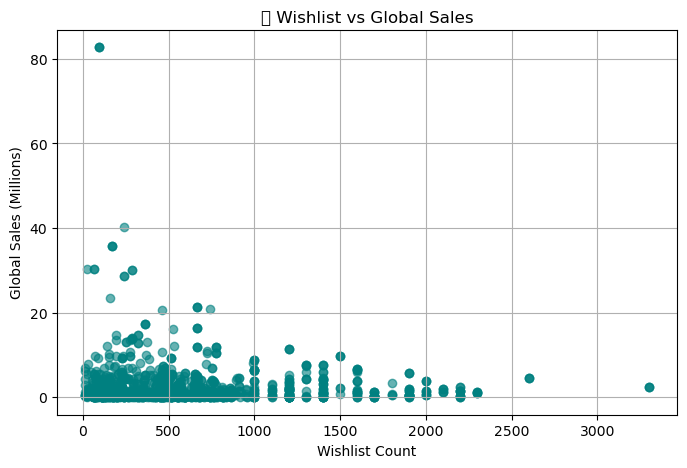

In [103]:
# Wishlist vs Sales (Scatter Plot)
plt.figure(figsize=(8,5))
plt.scatter(merged_df['Wishlist'], merged_df['Global_Sales'], alpha=0.6, color='teal')
plt.title('🔥 Wishlist vs Global Sales')
plt.xlabel('Wishlist Count')
plt.ylabel('Global Sales (Millions)')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


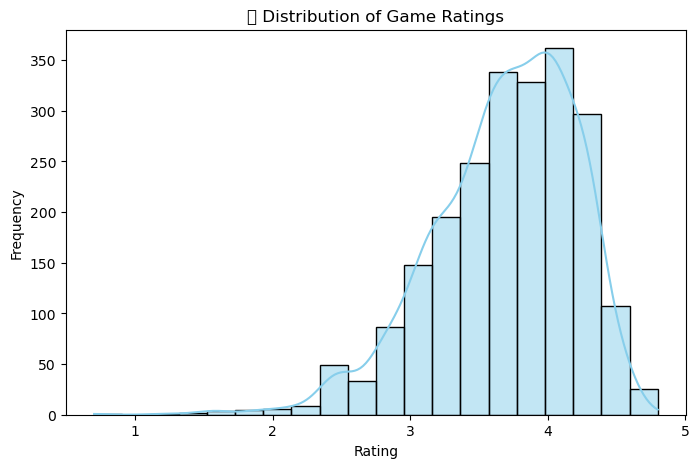

In [104]:
#  Histogram: Ratings Distribution ---
plt.figure(figsize=(8,5))
sns.histplot(merged_df['Rating'].dropna(), bins=20, kde=True, color="skyblue")
plt.title("📊 Distribution of Game Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


C:\Users\tatob\AppData\Local\Temp\ipykernel_15684\3511701583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma", hue=None, dodge=False)


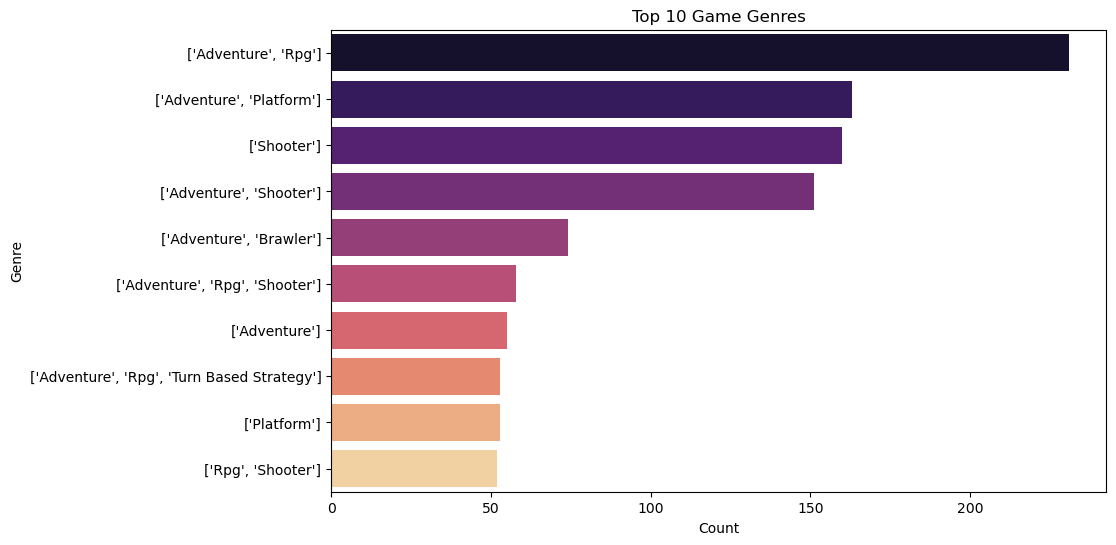

In [105]:
# --- 3. Bar Chart: Most Common Genres ---
genre_counts = merged_df['Genres'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma", hue=None, dodge=False)
plt.title("Top 10 Game Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


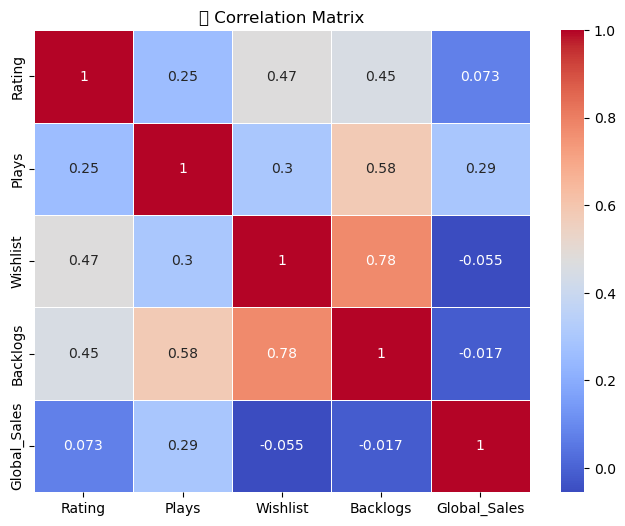

In [106]:
# --- 7. Heatmap: Correlation Matrix ---
plt.figure(figsize=(8,6))
corr = merged_df[['Rating', 'Plays', 'Wishlist', 'Backlogs', 'Global_Sales']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🧠 Correlation Matrix")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


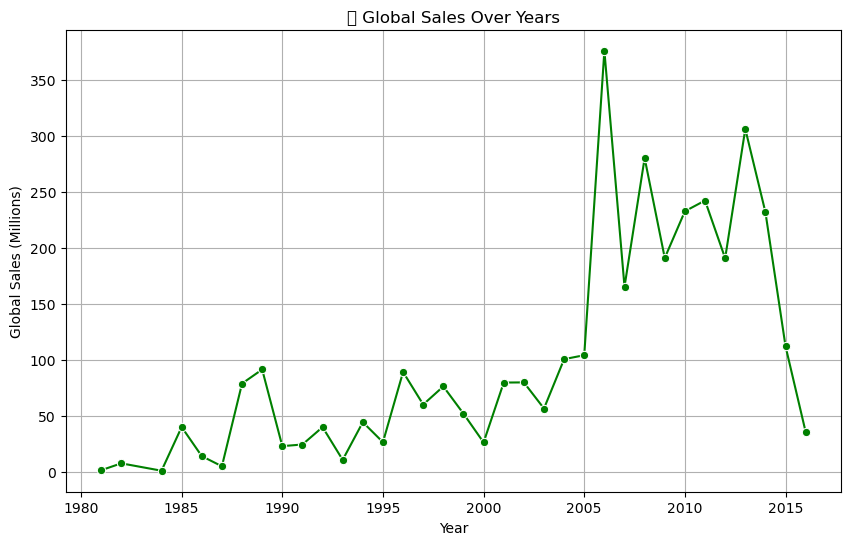

In [107]:
 # Line Chart: Sales Over Years ---
year_sales = merged_df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x=year_sales.index, y=year_sales.values, marker="o", color="green")
plt.title("📈 Global Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(True)
plt.show()

# 🧩 GAMES.CSV ANALYSIS

In [177]:
# 1️⃣ 🌟 What are the top-rated games by user reviews?
# Top Rated Games
print("🎯 Top 10 Rated Games:")
top_games = merged_df[['Game_Title', 'Rating']].dropna().sort_values(by='Rating', ascending=False).head(10)
display(top_games)


🎯 Top 10 Rated Games:


,Game_Title,Rating
1860,Elden Ring: Shadow of the Erdtree,4.8
1557,Bloodborne: The Old Hunters,4.6
1721,Dwarf Fortress,4.6
1899,Tokyo Necro,4.6
1350,Disco Elysium,4.6
665,Disco Elysium,4.6
220,Disco Elysium,4.6
1223,Outer Wilds,4.6
60,Outer Wilds,4.6
1693,Half-Life: Alyx,4.6


In [179]:
# 2️⃣🧑‍🤝‍🧑 Which developers (Teams) have the highest average ratings?
team_stats = games.groupby('Team').agg(
    games_count=('Title','count'),
    avg_rating=('Rating','mean'),
    avg_plays=('Plays','mean')
).reset_index()
top_teams = team_stats[team_stats['games_count']>=3].sort_values('avg_rating', ascending=False).head(10)
display(top_teams)

,Team,games_count,avg_rating,avg_plays
763,['Za/Um'],6,4.600000,5000.000000
378,"['Mobius Digital', 'Annapurna Interactive']",4,4.575000,6175.000000
246,"['Fromsoftware', 'Sony Computer Entertainment']",5,4.540000,11960.000000
668,"['Team Silent', 'Konami']",4,4.500000,6578.500000
328,"['Konami Computer Entertainment Japan', 'Konami']",5,4.500000,8260.000000
625,"['Square Enix', 'Platinumgames']",3,4.466667,1180.000000
661,['Team Cherry'],5,4.440000,14160.000000
121,"['Buena Vista Games', 'Square Enix']",3,4.433333,6133.333333
241,"['Fromsoftware', 'Activision']",3,4.400000,14000.000000
658,"['Take-Two Interactive', 'Rockstar Games']",3,4.400000,19000.000000


In [180]:
# 3️⃣🧩 What are the most common genres in the dataset?
from collections import Counter
genre_counter = Counter()
for lst in games['Genres']:
    genre_counter.update(lst)
most_common_genres = pd.DataFrame(genre_counter.most_common(), columns=['Genre','Count']).head(20)
display(most_common_genres)

,Genre,Count
0,',7284
1,e,3530
2,r,2623
3,t,2516
4,,2470
5,",",2133
6,n,1604
7,d,1548
8,u,1514
9,[,1512


In [181]:
# 4️⃣ ⏳ Which games have the highest backlog compared to wishlist?
gw = games.copy()
gw['Backlog_vs_Wishlist_diff'] = gw['Backlogs'] - gw['Wishlist']
gw['Backlog_vs_Wishlist_ratio'] = gw.apply(
    lambda r: r['Backlogs']/r['Wishlist'] if pd.notnull(r['Backlogs']) and pd.notnull(r['Wishlist']) and r['Wishlist']>0 else np.nan,
    axis=1
)
top_backlog_vs_wishlist = gw.sort_values(['Backlog_vs_Wishlist_ratio','Backlog_vs_Wishlist_diff'], ascending=[False, False])[
    ['Title','Team','Backlogs','Wishlist','Backlog_vs_Wishlist_ratio','Backlog_vs_Wishlist_diff']
].head(15)
display(top_backlog_vs_wishlist)

,Title,Team,Backlogs,Wishlist,Backlog_vs_Wishlist_ratio,Backlog_vs_Wishlist_diff
661,Paladins,['Hi-Rez Studios'],188.0,16.0,11.750000,172.0
1289,Figment,['Bedtime Digital Games'],392.0,35.0,11.200000,357.0
842,Fortnite,['Epic Games'],470.0,47.0,10.000000,423.0
959,Pokémon Go,"['The Pokémon Company', 'Niantic Labs']",197.0,22.0,8.954545,175.0
727,Half-Life: Opposing Force,"['Gearbox Software', 'Sierra Entertainment']",838.0,95.0,8.821053,743.0
1023,Destiny 2,"['Activision', 'Bungie']",845.0,103.0,8.203883,742.0
1053,Brawlhalla,"['Ubisoft', 'Blue Mammoth Games']",294.0,36.0,8.166667,258.0
1119,BioShock 2 Remastered,"['2K Games', '2K Australia']",2000.0,246.0,8.130081,1754.0
1129,Borderlands: The Pre-Sequel,"['Take-Two Interactive', 'Gearbox Software']",1900.0,238.0,7.983193,1662.0
1201,PUBG: Battlegrounds,"['Bluehole Studio', 'Pubg Corp']",253.0,32.0,7.906250,221.0


In [182]:
# 5️⃣ 🗓️ What is the game release trend across years?
release_trend = games.groupby('Release Date').size().reset_index(name='count').sort_values('Release Date')
display(release_trend.tail(20))


,Release Date,count
966,2023-02-15,1
967,2023-02-16,1
968,2023-02-21,1
969,2023-02-23,1
970,2023-02-24,2
971,2023-02-27,1
972,2023-02-28,1
973,2023-03-03,2
974,2023-03-17,1
975,2023-03-22,1


In [183]:
# 6️⃣ 🔎 What is the distribution of user ratings?
rating_dist = games['Rating'].dropna().round(2).value_counts().sort_index().reset_index().rename(columns={'index':'Rating','Rating':'Count'})
display(rating_dist)


,Count,count
0,0.7,1
1,1.2,1
2,1.4,1
3,1.5,1
4,1.6,2
5,1.8,1
6,1.9,4
7,2.0,1
8,2.1,4
9,2.2,3


In [121]:
# 7️⃣🧑 What are the top 10 most wishlisted games?
top_wishlisted = games[['Title','Team','Wishlist','Backlogs','Plays']].sort_values('Wishlist', ascending=False).head(10)
display(top_wishlisted)

,Title,Team,Wishlist,Backlogs,Plays
972,The Legend of Zelda: Tears of the Kingdom,"['Nintendo', 'Nintendo Epd Production Group No...",5400.0,1600.0,72.0
776,Elden Ring,"['Bandai Namco Entertainment', 'Fromsoftware']",4800.0,4600.0,17000.0
326,Elden Ring,"['Bandai Namco Entertainment', 'Fromsoftware']",4800.0,4600.0,17000.0
0,Elden Ring,"['Bandai Namco Entertainment', 'Fromsoftware']",4800.0,4600.0,17000.0
6,Omori,"['Omocat', 'Playism']",3800.0,4500.0,7200.0
782,Omori,"['Omocat', 'Playism']",3800.0,4500.0,7200.0
332,Omori,"['Omocat', 'Playism']",3800.0,4500.0,7200.0
357,NieR Replicant ver.1.22474487139...,"['Toylogic', 'Square Enix']",3700.0,4100.0,6700.0
807,NieR Replicant ver.1.22474487139...,"['Toylogic', 'Square Enix']",3700.0,4100.0,6700.0
31,NieR Replicant ver.1.22474487139...,"['Toylogic', 'Square Enix']",3700.0,4100.0,6700.0


In [184]:
# 8️⃣ 🔬 What’s the average number of plays per genre?
games_exploded = games.explode('Genres')
avg_plays_per_genre = games_exploded.groupby('Genres').agg(
    avg_plays=('Plays','mean'), count_games=('Title','count')
).reset_index().rename(columns={'Genres':'Genre'}).sort_values('avg_plays', ascending=False)
display(avg_plays_per_genre.head(20))

,Genre,avg_plays,count_games
214,"['Platform', 'Puzzle', 'Shooter']",21750.000000,4
82,"['Adventure', 'Platform', 'Puzzle', 'Shooter']",19242.857143,7
50,"['Adventure', 'Indie', 'Platform', 'Rpg', 'Str...",18000.000000,1
147,"['Arcade', 'Indie', 'Platform', 'Shooter']",18000.000000,3
195,"['Indie', 'Racing', 'Sport']",17000.000000,3
188,"['Indie', 'Platform', 'Sport']",16000.000000,1
179,"['Fighting', 'Platform']",15720.000000,10
206,"['Indie', 'Strategy']",15150.000000,6
222,"['Puzzle', 'Real Time Strategy', 'Simulator', ...",14000.000000,1
34,"['Adventure', 'Brawler', 'Shooter', 'Strategy']",14000.000000,3


In [185]:
# 9️⃣ 🏢 Which developer studios are the most productive and impactful?
dev_prod = team_stats.sort_values('games_count', ascending=False).head(15)
dev_impact = team_stats.sort_values('avg_rating', ascending=False).head(15)
display(dev_prod)
display(dev_impact)

,Team,games_count,avg_rating,avg_plays
140,['Capcom'],35,3.722857,4645.057143
631,['Square Enix'],31,3.941935,3420.709677
478,['Nintendo'],19,3.810526,10068.842105
444,"['Nintendo', 'Game Freak']",19,3.805263,9415.789474
461,"['Nintendo', 'Nintendo Ead']",19,3.842105,13552.631579
427,"['Nintendo Ead', 'Nintendo']",16,3.887500,11396.250000
303,"['Intelligent Systems Co., Ltd.', 'Nintendo']",14,3.550000,3592.000000
571,"['Sega', 'Sonic Team']",11,2.754545,4154.545455
715,"['Ubisoft Montreal', 'Ubisoft Entertainment']",10,3.350000,10930.000000
278,"['Hal Laboratory', 'Nintendo']",10,3.900000,5380.000000


,Team,games_count,avg_rating,avg_plays
298,"['Inlusio Interactive', 'Io Interactive']",1,4.600,167.0
763,['Za/Um'],6,4.600,5000.0
31,"['Activision', 'Fromsoftware']",1,4.600,1400.0
4,['07Th Expansion'],2,4.600,1700.0
92,"['Bay 12 Games', 'Kitfox Games']",1,4.600,225.0
590,"['Sony Computer Entertainment', 'Fromsoftware']",1,4.600,1500.0
727,['Valve'],1,4.600,1900.0
331,['Konami Digital Entertainment'],1,4.600,2500.0
378,"['Mobius Digital', 'Annapurna Interactive']",4,4.575,6175.0
246,"['Fromsoftware', 'Sony Computer Entertainment']",5,4.540,11960.0


# 💰 VGSALES.CSV (Sales Data)ANALYSIS

In [188]:
# 1️⃣🌍 Which region generates the most game sales?
region_sums = sales[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().reset_index()
region_sums.columns = ['Region','Sum',]
display(region_sums)

,Region,Sum
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75
4,Global_Sales,8920.44


In [189]:
# 2️⃣ 🕹️ What are the best-selling platforms?
platform_sales = sales.groupby('Platform').agg(
    total_global_sales=('Global_Sales','sum'),
    games_count=('Name','count')
).reset_index().sort_values('total_global_sales', ascending=False)
display(platform_sales.head(20))

,Platform,total_global_sales,games_count
16,PS2,1255.64,2161
28,X360,979.96,1265
17,PS3,957.84,1329
26,Wii,926.71,1325
4,DS,822.49,2163
15,PS,730.66,1196
6,GBA,318.50,822
19,PSP,296.28,1213
18,PS4,278.10,336
13,PC,258.82,960


In [190]:
# 3️⃣ 📅 What’s the trend of game releases and sales over years?
sales_by_year = sales.groupby('Year').agg(
    total_global_sales=('Global_Sales','sum'),
    game_count=('Name','count')
).reset_index().sort_values('Year')
display(sales_by_year.tail(20))


,Year,total_global_sales,game_count
19,1999.0,251.27,338
20,2000.0,201.56,349
21,2001.0,331.47,482
22,2002.0,395.52,829
23,2003.0,357.85,775
24,2004.0,419.31,763
25,2005.0,459.94,941
26,2006.0,521.04,1008
27,2007.0,611.13,1202
28,2008.0,678.90,1428


In [191]:
# 4️⃣ 🏢 Who are the top publishers by sales?
publisher_sales = sales.groupby('Publisher').agg(
    total_global_sales=('Global_Sales','sum'),
    games_count=('Name','count')
).reset_index().sort_values('total_global_sales', ascending=False).head(15)
display(publisher_sales)


,Publisher,total_global_sales,games_count
359,Nintendo,1786.56,703
138,Electronic Arts,1110.32,1351
21,Activision,727.46,975
456,Sony Computer Entertainment,607.50,683
525,Ubisoft,474.72,921
494,Take-Two Interactive,399.54,413
488,THQ,340.77,715
275,Konami Digital Entertainment,283.64,832
446,Sega,272.99,639
347,Namco Bandai Games,254.09,932


In [192]:
# 5️⃣ 🔝 Which games are the top 10 best-sellers globally?
top10_global = sales.sort_values('Global_Sales', ascending=False)[
    ['Name','Platform','Year','Sales_Genre','Publisher','Global_Sales']
].head(10)
display(top10_global)

,Name,Platform,Year,Sales_Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31


In [193]:
# 6️⃣ 🧭 How do regional sales compare for specific platforms?
top_platforms = platform_sales.head(5)['Platform'].tolist()
regional_by_platform = sales[sales['Platform'].isin(top_platforms)].groupby(['Platform']).agg(
    NA_Sales=('NA_Sales','sum'),
    EU_Sales=('EU_Sales','sum'),
    JP_Sales=('JP_Sales','sum'),
    Other_Sales=('Other_Sales','sum')
).reset_index()
display(regional_by_platform)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,390.71,194.65,175.57,60.53
1,PS2,583.84,339.29,139.20,193.44
2,PS3,392.26,343.71,79.99,141.93
3,Wii,507.71,268.38,69.35,80.61
4,X360,601.05,280.58,12.43,85.54


In [194]:
# 7️⃣ 📈 How has the market evolved by platform over time?
platform_time = sales.groupby(['Year','Platform']).agg(
    total_global_sales=('Global_Sales','sum')
).reset_index()
platform_time_pivot = platform_time.pivot(index='Year', columns='Platform', values='total_global_sales').fillna(0)
display(platform_time_pivot.head(10))

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981.0,35.77,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982.0,28.86,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983.0,5.83,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984.0,0.27,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985.0,0.45,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986.0,0.66,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987.0,1.98,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988.0,0.75,0.0,0.0,0.0,0.00,1.43,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
# 8️⃣ 📍 What are the regional genre preferences?
regional_genre = sales.groupby('Sales_Genre').agg(
    NA_Sales=('NA_Sales','sum'),
    EU_Sales=('EU_Sales','sum'),
    JP_Sales=('JP_Sales','sum'),
    Other_Sales=('Other_Sales','sum'),
    Global_Sales=('Global_Sales','sum')
).reset_index().sort_values('Global_Sales', ascending=False)
display(regional_genre.head(20))

,Sales_Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,877.83,525.00,159.95,187.38,1751.18
10,Sports,683.35,376.85,135.37,134.97,1330.93
8,Shooter,582.60,313.27,38.28,102.69,1037.37
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
4,Platform,447.05,201.63,130.77,51.59,831.37
3,Misc,410.24,215.98,107.76,75.32,809.96
6,Racing,359.42,238.39,56.69,77.27,732.04
2,Fighting,223.59,101.32,87.35,36.68,448.91
9,Simulation,183.31,113.38,63.70,31.52,392.20
5,Puzzle,123.78,50.78,57.31,12.55,244.95


In [196]:
# 9️⃣ 🔄 What’s the yearly sales change per region?
year_region = sales.groupby('Year').agg(
    NA_Sales=('NA_Sales','sum'),
    EU_Sales=('EU_Sales','sum'),
    JP_Sales=('JP_Sales','sum'),
    Other_Sales=('Other_Sales','sum')
).reset_index().sort_values('Year')
year_region_pct_change = year_region.set_index('Year').pct_change().reset_index().fillna(0)
display(year_region_pct_change.tail(20))

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
19,1999.0,-0.017918,-0.063229,0.045963,-0.088849
20,2000.0,-0.250436,-0.158289,-0.182843,0.156219
21,2001.0,0.841253,0.798863,-0.068038,0.958692
22,2002.0,0.242614,0.156497,0.047667,0.198594
23,2003.0,-0.104538,-0.054037,-0.181034,-0.046554
24,2004.0,0.149801,0.033812,0.217836,0.818147
25,2005.0,0.089941,0.136228,0.303241,-0.141890
26,2006.0,0.084539,0.059866,0.358327,0.341301
27,2007.0,0.185961,0.241876,-0.182287,0.425684
28,2008.0,0.126230,0.148910,-0.000498,0.061727


In [197]:
# 🔟 🧮 What is the average sales per publisher?
avg_sales_per_publisher = sales.groupby('Publisher').agg(
    avg_global_sales=('Global_Sales','mean'),
    total_global_sales=('Global_Sales','sum'),
    games_count=('Name','count')
).reset_index().sort_values('avg_global_sales', ascending=False).head(15)
display(avg_sales_per_publisher)

,Publisher,avg_global_sales,total_global_sales,games_count
385,Palcom,4.170000,4.17,1
424,Red Orb,2.620000,5.24,2
359,Nintendo,2.541337,1786.56,703
40,Arena Entertainment,2.360000,4.72,2
522,UEP Systems,2.250000,2.25,1
426,RedOctane,2.170000,8.68,4
533,Valve,1.740000,1.74,1
219,Hello Games,1.600000,1.60,1
458,Sony Computer Entertainment Europe,1.592667,23.89,15
552,Westwood Studios,1.550000,1.55,1


In [204]:
# 1️⃣1️⃣  🏆 What are the top 5 best-selling games per platform?
top5_per_platform = sales.groupby('Platform').apply(
    lambda x: x.nlargest(5, 'Global_Sales')
).reset_index(drop=True)

# Select relevant columns
top5_per_platform = top5_per_platform[['Platform','Name','Year','Sales_Genre','Publisher','Global_Sales']]

display(top5_per_platform)

C:\Users\tatob\AppData\Local\Temp\ipykernel_15684\3451022486.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_per_platform = sales.groupby('Platform').apply(


,Platform,Name,Year,Sales_Genre,Publisher,Global_Sales
0,2600,Pac-Man,1982.0,Puzzle,Atari,7.81
1,2600,Pitfall!,1981.0,Platform,Activision,4.50
2,2600,Asteroids,1980.0,Shooter,Atari,4.31
3,2600,Missile Command,1980.0,Shooter,Atari,2.76
4,2600,Space Invaders,NaN,Shooter,Atari,2.53
...,...,...,...,...,...,...
137,XOne,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,7.30
138,XOne,Call of Duty: Advanced Warfare,2014.0,Shooter,Activision,5.13
139,XOne,Grand Theft Auto V,2014.0,Action,Take-Two Interactive,5.08
140,XOne,Halo 5: Guardians,2015.0,Shooter,Microsoft Game Studios,4.26


# 🎮 MERGED DATASET (Sales + Engagement + Ratings)

In [161]:
# 1️⃣ 🎮 Which game genres generate the most global sales?
merged = games.merge(sales, left_on='Title', right_on='Name', how='inner')

# Explode genres
merged_exploded = merged.explode('Genres')

# Global sales per genre
genre_sales = merged_exploded.groupby('Genres').agg(
    total_global_sales=('Global_Sales','sum'),
    avg_global_sales=('Global_Sales','mean'),
    game_count=('Title','count')
).reset_index().sort_values('total_global_sales', ascending=False)

display(genre_sales.head(20))


,Genres,total_global_sales,avg_global_sales,game_count
29,"['Adventure', 'Platform']",528.82,4.406833,120
100,['Shooter'],377.03,2.772279,136
51,"['Adventure', 'Rpg']",309.41,2.104830,147
54,"['Adventure', 'Shooter']",289.24,2.808155,103
101,"['Simulator', 'Sport']",248.22,82.740000,3
87,['Racing'],185.13,8.815714,21
82,['Platform'],155.70,3.460000,45
56,"['Adventure', 'Simulator']",100.07,4.002800,25
89,"['Rpg', 'Shooter']",95.98,1.958776,49
14,"['Adventure', 'Brawler']",87.55,1.591818,55


,Rating,avg_global_sales,count_games
0,0.7,0.410000,1
1,1.4,0.580000,1
2,1.6,0.512500,4
3,1.8,0.270000,1
4,1.9,2.770000,2
5,2.1,0.425000,2
6,2.3,0.420000,1
7,2.4,3.207778,9
8,2.5,2.008500,20
9,2.6,1.642500,4


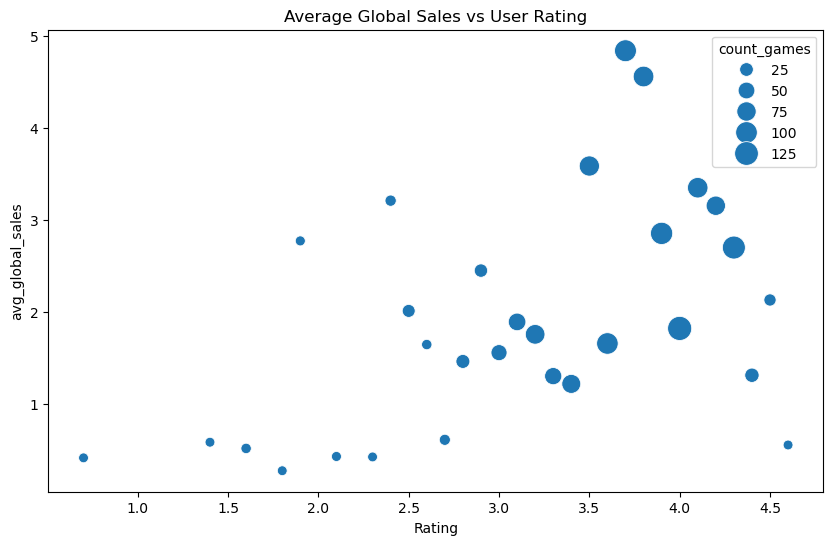

In [166]:
# 2️⃣ 🎯 How does user rating affect global sales?
# Filter valid ratings
rating_sales = merged[merged['Rating'].notnull()]

# Average global sales by rating
rating_vs_sales = rating_sales.groupby('Rating').agg(
    avg_global_sales=('Global_Sales','mean'),
    count_games=('Title','count')
).reset_index().sort_values('Rating')

display(rating_vs_sales)

plt.figure(figsize=(10,6))
sns.scatterplot(data=rating_vs_sales, x='Rating', y='avg_global_sales', size='count_games', sizes=(50,300))
plt.title('Average Global Sales vs User Rating')
plt.show()


In [163]:
# 3️⃣ 🕹️ Which platforms have the most games with high ratings (e.g., above 4)?
high_rated_games = merged[merged['Rating'] >= 4]
platform_high_rated = high_rated_games.groupby('Platform').agg(
    high_rated_count=('Title','count')
).reset_index().sort_values('high_rated_count', ascending=False)

display(platform_high_rated)


,Platform,high_rated_count
7,PC,53
10,PS3,52
18,X360,48
9,PS2,46
8,PS,31
11,PS4,27
1,DS,22
15,SNES,21
4,GC,19
16,Wii,18


,Release Date,total_global_sales,games_released
0,1980-05-22,9.03,2
1,1982-02-03,1.65,1
2,1985-09-13,45.31,2
3,1986-02-21,13.02,2
4,1986-09-26,1.87,2
...,...,...,...
441,2019-09-20,11.49,3
442,2020-09-18,6.31,1
443,2020-11-12,5.52,3
444,2022-07-22,0.96,3


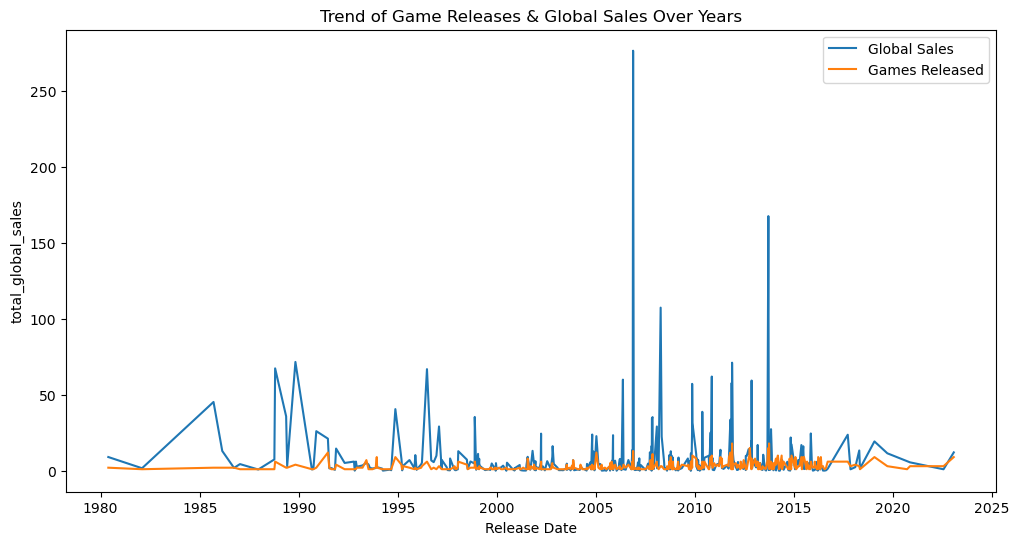

In [165]:
# 4️⃣ 📈 What’s the trend of releases and sales over time?
sales_trend = merged.groupby('Release Date').agg(
    total_global_sales=('Global_Sales','sum'),
    games_released=('Title','count')
).reset_index().sort_values('Release Date')

display(sales_trend)

# Optional plot
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_trend, x='Release Date', y='total_global_sales', label='Global Sales')
sns.lineplot(data=sales_trend, x='Release Date', y='games_released', label='Games Released')
plt.title('Trend of Game Releases & Global Sales Over Years')
plt.show()


Correlation between Wishlist and Global Sales: 0.20994091721611316


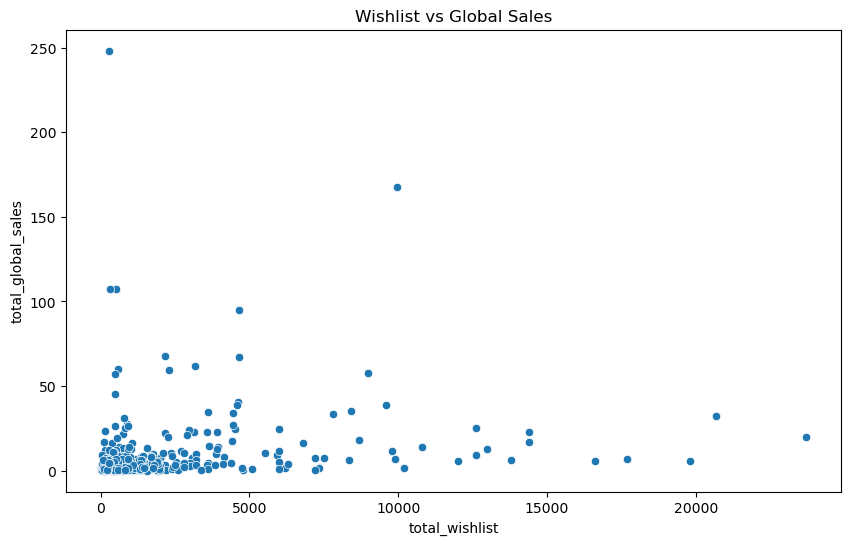

In [167]:
# 5️⃣ 🧍 Do highly wishlisted games lead to more sales?
wishlist_sales = merged.groupby('Title').agg(
    total_wishlist=('Wishlist','sum'),
    total_global_sales=('Global_Sales','sum')
).reset_index()

# Correlation
corr = wishlist_sales['total_wishlist'].corr(wishlist_sales['total_global_sales'])
print("Correlation between Wishlist and Global Sales:", corr)

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=wishlist_sales, x='total_wishlist', y='total_global_sales')
plt.title('Wishlist vs Global Sales')
plt.show()


In [168]:
# 6️⃣ 🎮 Which genres have the highest engagement but lowest sales?
# Engagement = Plays + Backlogs + Wishlist
merged_exploded['engagement'] = merged_exploded[['Plays','Backlogs','Wishlist']].sum(axis=1, skipna=True)

genre_engagement_sales = merged_exploded.groupby('Genres').agg(
    total_engagement=('engagement','sum'),
    total_global_sales=('Global_Sales','sum')
).reset_index()

# High engagement, low sales
genre_high_eng_low_sales = genre_engagement_sales.sort_values(
    by=['total_engagement','total_global_sales'], ascending=[False, True]
)
display(genre_high_eng_low_sales.head(15))


,Genres,total_engagement,total_global_sales
51,"['Adventure', 'Rpg']",2095728.0,309.41
100,['Shooter'],1489999.0,377.03
54,"['Adventure', 'Shooter']",1405143.0,289.24
29,"['Adventure', 'Platform']",1367169.0,528.82
89,"['Rpg', 'Shooter']",695632.0,95.98
56,"['Adventure', 'Simulator']",690635.0,100.07
14,"['Adventure', 'Brawler']",654088.0,87.55
24,"['Adventure', 'Platform', 'Puzzle', 'Shooter']",423620.0,36.44
47,"['Adventure', 'Rpg', 'Shooter']",414998.0,80.69
82,['Platform'],392799.0,155.70


Correlation between total listed (wishlist+backlogs) and rating: 0.5164494843261787


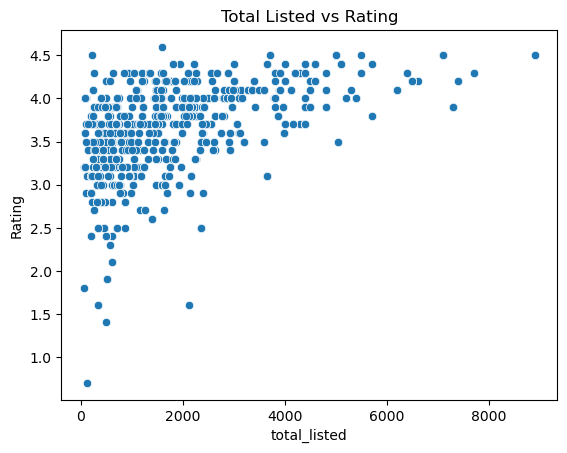

In [169]:
# 7️⃣ 🧠 Do highly listed games (wishlist/backlogs) correlate with better ratings?
merged['total_listed'] = merged['Wishlist'].fillna(0) + merged['Backlogs'].fillna(0)

listed_rating_corr = merged[['total_listed','Rating']].dropna()
corr_val = listed_rating_corr['total_listed'].corr(listed_rating_corr['Rating'])
print("Correlation between total listed (wishlist+backlogs) and rating:", corr_val)

sns.scatterplot(data=listed_rating_corr, x='total_listed', y='Rating')
plt.title('Total Listed vs Rating')
plt.show()


In [170]:
# 8️⃣ 🏷️ How does user engagement differ across genres?
genre_engagement = merged_exploded.groupby('Genres').agg(
    avg_plays=('Plays','mean'),
    avg_backlogs=('Backlogs','mean'),
    avg_wishlist=('Wishlist','mean'),
    game_count=('Title','count')
).reset_index().sort_values('avg_plays', ascending=False)

display(genre_engagement.head(20))


,Genres,avg_plays,avg_backlogs,avg_wishlist,game_count
56,"['Adventure', 'Simulator']",26536.000000,898.080000,191.320000,25
24,"['Adventure', 'Platform', 'Puzzle', 'Shooter']",20964.705882,3108.588235,845.529412,17
18,"['Adventure', 'Indie', 'Platform', 'Rpg', 'Str...",18000.000000,2200.000000,593.000000,8
101,"['Simulator', 'Sport']",18000.000000,320.000000,93.000000,3
75,"['Indie', 'Racing', 'Sport']",17000.000000,698.000000,113.000000,9
84,"['Puzzle', 'Real Time Strategy', 'Simulator', ...",14000.000000,493.000000,82.000000,4
11,"['Adventure', 'Brawler', 'Shooter', 'Strategy']",14000.000000,4200.000000,2000.000000,6
37,"['Adventure', 'Puzzle', 'Shooter']",13000.000000,2900.000000,892.000000,2
36,"['Adventure', 'Puzzle', 'Rpg']",12400.000000,3040.000000,948.800000,5
98,"['Shooter', 'Strategy']",12259.400000,561.200000,270.000000,5


In [171]:
# 9️⃣ 🎉 Top-performing combinations of Genre + Platform
genre_platform_sales = merged_exploded.groupby(['Genres','Platform']).agg(
    total_global_sales=('Global_Sales','sum'),
    avg_rating=('Rating','mean'),
    game_count=('Title','count')
).reset_index().sort_values('total_global_sales', ascending=False)

display(genre_platform_sales.head(20))


,Genres,Platform,total_global_sales,avg_rating,game_count
457,"['Simulator', 'Sport']",Wii,248.22,3.700000,3
454,['Shooter'],X360,163.37,3.560000,25
131,"['Adventure', 'Platform']",Wii,125.98,3.869231,13
395,['Racing'],Wii,107.94,3.750000,4
116,"['Adventure', 'Platform']",DS,100.43,3.770000,10
246,"['Adventure', 'Shooter']",PS3,99.09,3.389474,19
449,['Shooter'],PS3,93.60,3.456250,16
249,"['Adventure', 'Shooter']",X360,70.79,3.384211,19
289,"['Arcade', 'Puzzle']",GB,60.52,4.100000,2
130,"['Adventure', 'Platform']",SNES,59.80,3.925000,8


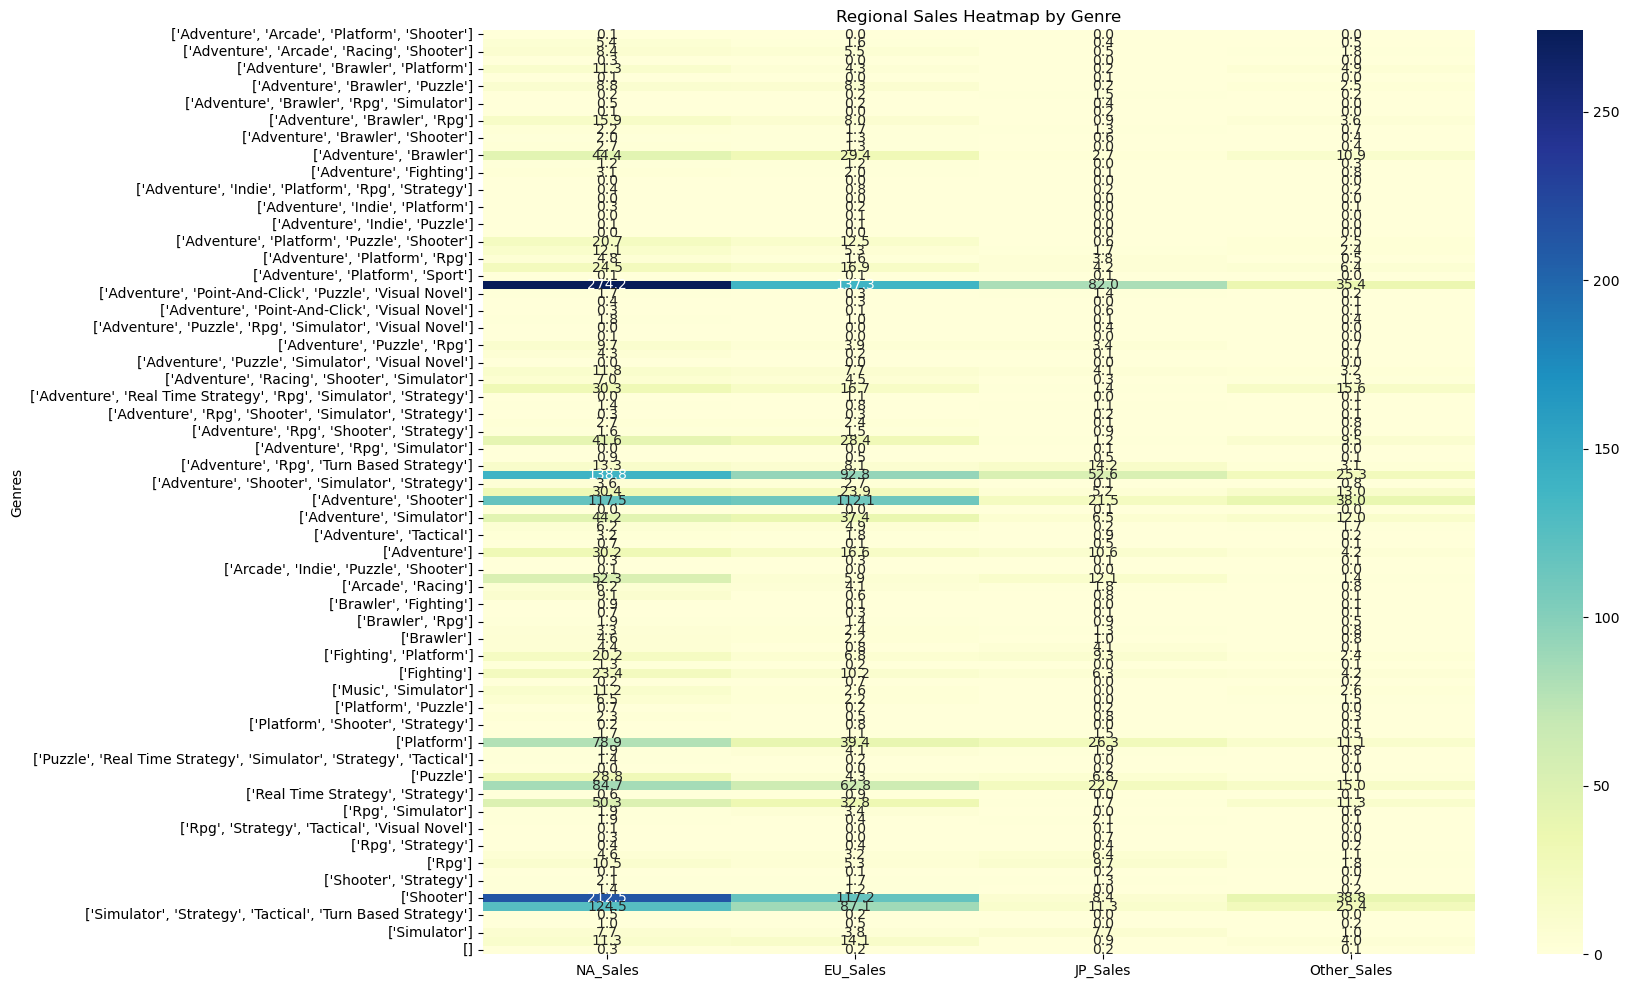

In [176]:
# 🔟 🌐 Regional sales heatmap by genre
regional_genre_sales = merged_exploded.groupby('Genres').agg(
    NA_Sales=('NA_Sales','sum'),
    EU_Sales=('EU_Sales','sum'),
    JP_Sales=('JP_Sales','sum'),
    Other_Sales=('Other_Sales','sum')
).reset_index().set_index('Genres')

plt.figure(figsize=(16,12))
sns.heatmap(regional_genre_sales, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Regional Sales Heatmap by Genre')
plt.show()
